<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -5 to +5 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. StepLR with step size 6 and gamma value 0.1. 

Target: 
======

In this step

1. The Requirement for us is to achieve better accuracy with less number of steps.
2. Knowing MNIST dataset , I believe slightly higher leanring rate may reach the minimum faster , So I am going to increase the LR a little 

Result: 
======
1. Observed Train accuracy: 99.04%
2. Validation accuracy:99.44 %
3. Number of parameters: 8,582


Analysis: 
========

1. As expected the validation accuracy improved and stabilized much better
2. The model also improved from one epoch to another and converged faster

In [2]:
from model import model6 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 28, 28]             126
              ReLU-2           [-1, 14, 28, 28]               0
       BatchNorm2d-3           [-1, 14, 28, 28]              28
         Dropout2d-4           [-1, 14, 28, 28]               0
            Conv2d-5           [-1, 14, 28, 28]           1,764
              ReLU-6           [-1, 14, 28, 28]               0
       BatchNorm2d-7           [-1, 14, 28, 28]              28
         Dropout2d-8           [-1, 14, 28, 28]               0
         MaxPool2d-9           [-1, 14, 14, 14]               0
           Conv2d-10           [-1, 14, 14, 14]           1,764
             ReLU-11           [-1, 14, 14, 14]               0
      BatchNorm2d-12           [-1, 14, 14, 14]              28
        Dropout2d-13           [-1, 14, 14, 14]               0
           Conv2d-14           [-1, 14,

G:\TSAI-ERA\Session 7\model.py:355: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
rotation_range = (-5.0, 5.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [11]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


  0%|                                                                                          | 0/938 [00:00<?, ?it/s]G:\TSAI-ERA\Session 7\model.py:355: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.058478739112615585 Batch_id=937 Accuracy=93.37: 100%|█████████████████████████| 938/938 [01:02<00:00, 14.93it/s]



Test set: Average loss: 0.0444, Accuracy: 9862/10000 (98.62%)

Currently Executing Epoch: 2


Loss=0.05994714796543121 Batch_id=937 Accuracy=97.60: 100%|██████████████████████████| 938/938 [01:12<00:00, 12.93it/s]



Test set: Average loss: 0.0350, Accuracy: 9894/10000 (98.94%)

Currently Executing Epoch: 3


Loss=0.06500750780105591 Batch_id=937 Accuracy=98.11: 100%|██████████████████████████| 938/938 [01:13<00:00, 12.74it/s]



Test set: Average loss: 0.0255, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 4


Loss=0.03668343648314476 Batch_id=937 Accuracy=98.24: 100%|██████████████████████████| 938/938 [01:13<00:00, 12.81it/s]



Test set: Average loss: 0.0221, Accuracy: 9928/10000 (99.28%)

Currently Executing Epoch: 5


Loss=0.004617121536284685 Batch_id=937 Accuracy=98.44: 100%|█████████████████████████| 938/938 [01:11<00:00, 13.06it/s]



Test set: Average loss: 0.0246, Accuracy: 9927/10000 (99.27%)

Currently Executing Epoch: 6


Loss=0.012232540175318718 Batch_id=937 Accuracy=98.53: 100%|█████████████████████████| 938/938 [01:12<00:00, 12.96it/s]



Test set: Average loss: 0.0229, Accuracy: 9929/10000 (99.29%)

Currently Executing Epoch: 7


Loss=0.045244000852108 Batch_id=937 Accuracy=98.79: 100%|████████████████████████████| 938/938 [01:12<00:00, 13.01it/s]



Test set: Average loss: 0.0196, Accuracy: 9938/10000 (99.38%)

Currently Executing Epoch: 8


Loss=0.015557944774627686 Batch_id=937 Accuracy=98.89: 100%|█████████████████████████| 938/938 [01:11<00:00, 13.09it/s]



Test set: Average loss: 0.0191, Accuracy: 9937/10000 (99.37%)

Currently Executing Epoch: 9


Loss=0.01693139597773552 Batch_id=937 Accuracy=98.96: 100%|██████████████████████████| 938/938 [01:12<00:00, 12.97it/s]



Test set: Average loss: 0.0188, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 10


Loss=0.005920913070440292 Batch_id=937 Accuracy=98.96: 100%|█████████████████████████| 938/938 [01:13<00:00, 12.76it/s]



Test set: Average loss: 0.0185, Accuracy: 9939/10000 (99.39%)

Currently Executing Epoch: 11


Loss=0.00450515653938055 Batch_id=937 Accuracy=98.97: 100%|██████████████████████████| 938/938 [01:15<00:00, 12.40it/s]



Test set: Average loss: 0.0181, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 12


Loss=0.005634822882711887 Batch_id=937 Accuracy=99.02: 100%|█████████████████████████| 938/938 [01:11<00:00, 13.07it/s]



Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

Currently Executing Epoch: 13


Loss=0.003404168412089348 Batch_id=937 Accuracy=99.04: 100%|█████████████████████████| 938/938 [01:13<00:00, 12.78it/s]



Test set: Average loss: 0.0176, Accuracy: 9941/10000 (99.41%)

Currently Executing Epoch: 14


Loss=0.00439037661999464 Batch_id=937 Accuracy=98.99: 100%|██████████████████████████| 938/938 [01:13<00:00, 12.77it/s]



Test set: Average loss: 0.0182, Accuracy: 9944/10000 (99.44%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

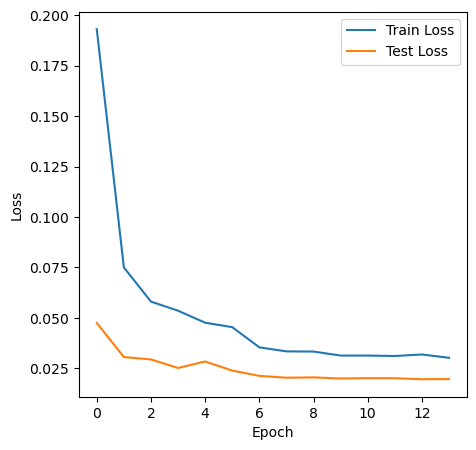

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

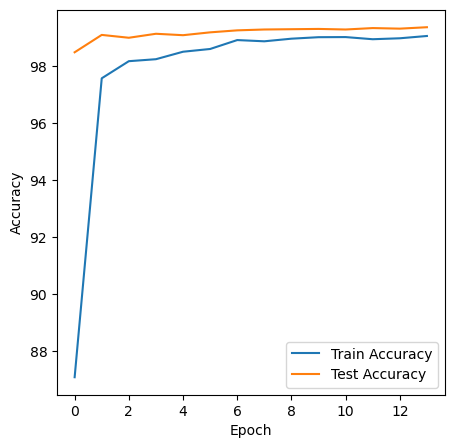

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
